# EP2420 - Project 1

## Task 2 - Estimating Service Metrics from Device Statistics using Linear Regression

In [39]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

### Data import and first analysis

In [40]:
X = pd.read_csv("data/X.csv")
Y = pd.read_csv("data/Y.csv")
X.head()

,TimeStamp,runq-sz,%%memused,proc/s,cswch/s,all_%%usr,ldavg-1,totsck,pgfree/s,plist-sz,file-nr,idel/s,tps
0,1409585052,91,17.30,0.0,75865.0,97.96,122.77,557,80335.0,1019,2976,24.0,11.0
1,1409585053,86,17.31,0.0,74651.0,98.29,122.77,556,74681.0,1019,2976,23.0,0.0
2,1409585054,89,17.32,0.0,78790.0,98.00,122.77,556,78166.0,1019,2976,23.0,0.0
3,1409585055,88,17.33,0.0,75077.0,97.75,122.77,555,74256.0,1019,2976,21.0,0.0
4,1409585056,96,17.32,10.0,72717.0,97.79,122.77,553,84232.0,1011,2976,67.0,2.0


In [41]:
Y = Y.drop("TimeStamp", axis=1)
Y.head()

,DispFrames
0,13.00
1,13.00
2,13.82
3,16.23
4,15.95


Let's mix the features and output datafiles together !

In [42]:
df = X
df["Y"] = Y
df.head()

,TimeStamp,runq-sz,%%memused,proc/s,cswch/s,all_%%usr,ldavg-1,totsck,pgfree/s,plist-sz,file-nr,idel/s,tps,Y
0,1409585052,91,17.30,0.0,75865.0,97.96,122.77,557,80335.0,1019,2976,24.0,11.0,13.00
1,1409585053,86,17.31,0.0,74651.0,98.29,122.77,556,74681.0,1019,2976,23.0,0.0,13.00
2,1409585054,89,17.32,0.0,78790.0,98.00,122.77,556,78166.0,1019,2976,23.0,0.0,13.82
3,1409585055,88,17.33,0.0,75077.0,97.75,122.77,555,74256.0,1019,2976,21.0,0.0,16.23
4,1409585056,96,17.32,10.0,72717.0,97.79,122.77,553,84232.0,1011,2976,67.0,2.0,15.95


### 2.2 Study the Relationship between Estimation Error and the Size of the Training Set

1. 

In [43]:
# Creation of the different matrix. The feature matrix X and the service metrics matrix Y.
X = df.drop(labels = ['Y','TimeStamp'],axis = 1)
Y = df['Y']

indices = np.arange(len(X))

# Shuffle the indices to have a random test set
np.random.shuffle(indices) 

test_indices = indices[:1000] # We select the first 1000 indices for the test set

# Test set creation
X_test = X.iloc[test_indices]
Y_test = Y.iloc[test_indices]

# We remove indices used for the test set
indices = indices[~test_indices]

# Initialization of train sets
train_size = [50, 100, 200, 400, 800, 1600]

# Indices for each train set
S = [np.random.choice(indices,size,replace=True) for size in train_size]

# Creation of each train set
# X_S1 = X.iloc[S[0]]
# Y_S1 = Y.iloc[S[0]]
# .
# .
# .
# X_S6 = X.iloc[S[5]]
# Y_S6 = Y.iloc[S[5]]
# 
# We don't need to create these vectors because all the information is in the S vector !

2. 

In [44]:
# Creation of the Linear Model
model = LinearRegression()

# Creation of a NMAE vector of size 6 (number of train sets)
NMAE = np.zeros(6)

# For each train set size, we get the train set, train the model and compute the NMAE, then store it.
for i in range(6):
    
    model.fit(X.iloc[S[i]],Y.iloc[S[i]])
    predictions_S_i = model.predict(X_test)
    NMAE[i] = mean_absolute_error(Y_test,predictions_S_i)/np.mean(Y_test)

NMAE

array([0.13738099, 0.09498453, 0.09015948, 0.09060146, 0.09029592,
       0.08826227])

3. 

In [45]:
NMAE = np.zeros((6,50))

# For each training size, we do the previous reasoning 50 times
for i,size in enumerate(train_size):

    for j in range (50):
        # We randomly choose the indices for the train set, according to the size
        S = np.random.choice(indices,size,replace=True)
        # We fit the model to the train set and compute the NMAE with the predictions on the test set
        model.fit(X.iloc[S],Y.iloc[S])
        NMAE [i,j]= mean_absolute_error(Y_test,model.predict(X_test))/np.mean(Y_test)

NMAE_mean = np.mean(NMAE,axis=1)
NMAE_std = np.std(NMAE,axis=1)
NMAE_mean

array([0.12335439, 0.10363523, 0.09512665, 0.09004975, 0.08876737,
       0.08815179])

4. 

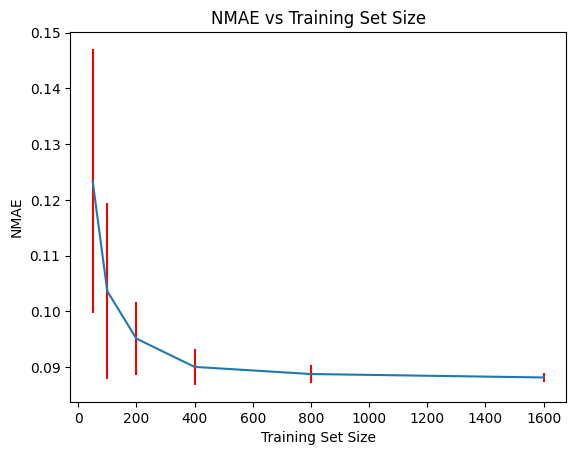

In [46]:
# Creation of a plot with error bars corresponding to the standard deviation of the NMAE for each train size
plt.errorbar(x=train_size, y = NMAE_mean, yerr=NMAE_std,ecolor='r')

plt.title('NMAE vs Training Set Size')
plt.xlabel('Training Set Size')
plt.ylabel('NMAE')
plt.show()

*What is the computational complexity of the optimal method and the heuristic method in Task 3 in function of the size of the original feature set (which is the same as the dimensionality of the feature space) ?*

**Answer** 

The computational complexity of the optimal method is $ O (2^n) $ since we are computing the NMAE on the test set for each of the feature subsets, and we know that a feature subset of size $n$ has $2^n$ subsets. As the number of features increases, the computational complexity grows exponentially. We can select the subset of features that minimizes the NMAE.

The computational complexity for the heuristic method is $O(n)$ since we are using a univariate feature selection technique. We compute the Pearson correlation for each feature with the target $y$, and we only have $n$ computations. We can select the features that have the highest Pearson correlation with the target.


## Task 3 - Reduce the Number of Device Statistics to Estimate the Service Metric

### 3.1 Optimal Method

1. 

In [47]:
from sklearn.model_selection import train_test_split

# Use of validation-set technique to split the set of observations into a train set and a test set.
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size = 0.7)


# We need to create a function to return all the subsets from the feature set
# We use a recursive method based on this method : https://media.geeksforgeeks.org/wp-content/uploads/20230911132238/print-all-subsets.png
# I helped myself with Chat GPT to generate this function, but I deeply understand how it works.

def subsets(X):
    
    # When we reach the end of the recursive method, we want to return an empty list. 
    # We need to have the empty subset !
    if not X.any() :
        return [[]]

    # We create all the subsets from our set, without the first element
    subsets_without_first = subsets(X[1:])
    first_element = X[0]

    # To create the new subsets, we just add the first element to all these subsets
    subsets_with_first = [subset + [first_element] for subset in subsets_without_first]

    # The result is the combinaison of the subsets without the first elements and the new subsets
    return subsets_without_first + subsets_with_first

all_indices = np.arange(12)
indices_subsets = sorted(subsets(all_indices),key = len) # This allows us to have a sorted list with increasing number of features for each subset
indices_subsets = indices_subsets[1:] # We remove the empty subset since we can't do Linear Regression with that.

In [48]:
# Initialization of minimal NMAE and best subset
NMAE_min = np.inf
NMAE_vector = np.zeros(len(indices_subsets)) # We create this vector to keep the trace of the NMAE for each subset
best_subset = None

for i,subset in enumerate(indices_subsets):
    X_train_subset = X_train.iloc[:,subset]
    X_test_subset = X_test.iloc[:,subset]

    model.fit(X_train_subset,Y_train)
    NMAE = mean_absolute_error(Y_test,model.predict(X_test_subset))/np.mean(Y_test)
    NMAE_vector[i] = NMAE

    if NMAE<NMAE_min:
        best_subset = subset
        NMAE_min = NMAE

print(NMAE_min)
best_subset
best_features = X_train.columns[best_subset]
print(best_features)
print(best_subset)

0.08744511269388608
Index(['idel/s', 'file-nr', 'plist-sz', 'pgfree/s', 'all_%%usr', 'cswch/s',
       '%%memused', 'runq-sz'],
      dtype='object')
[10, 9, 8, 7, 4, 3, 1, 0]


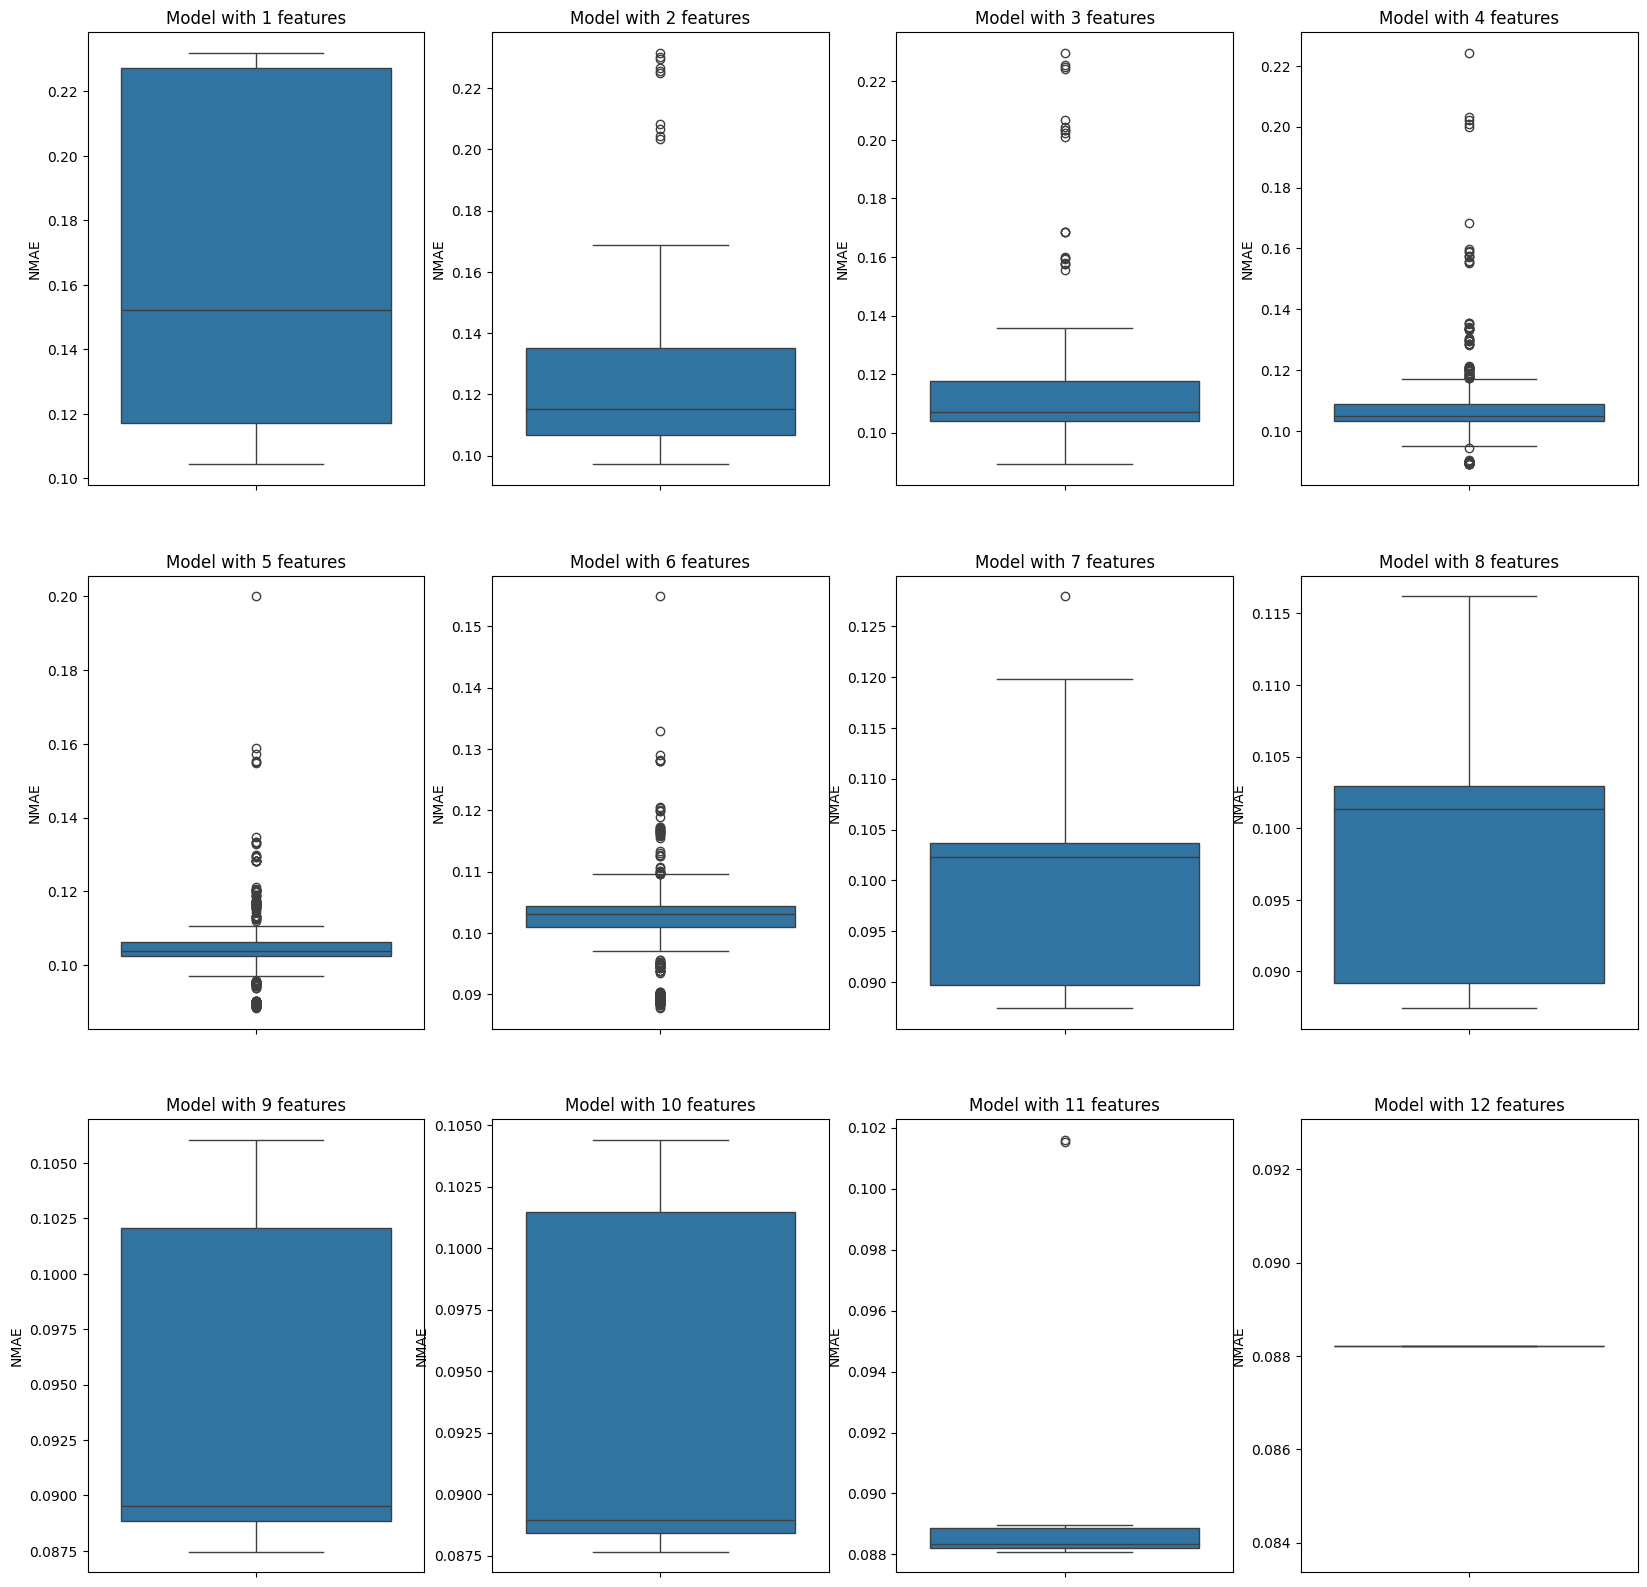

In [49]:
import seaborn as sns

plt.figure(figsize=(20,20))

for i in range(1,13):

    indices_subset_len_i = [index for index, element in enumerate(indices_subsets) if len(element) == i]
    NMAE_i = NMAE_vector[indices_subset_len_i]

    plt.subplot(3,4,i)
    sns.boxplot(data = NMAE_i)
    plt.title(f"Model with {i} features")
    plt.ylabel("NMAE")

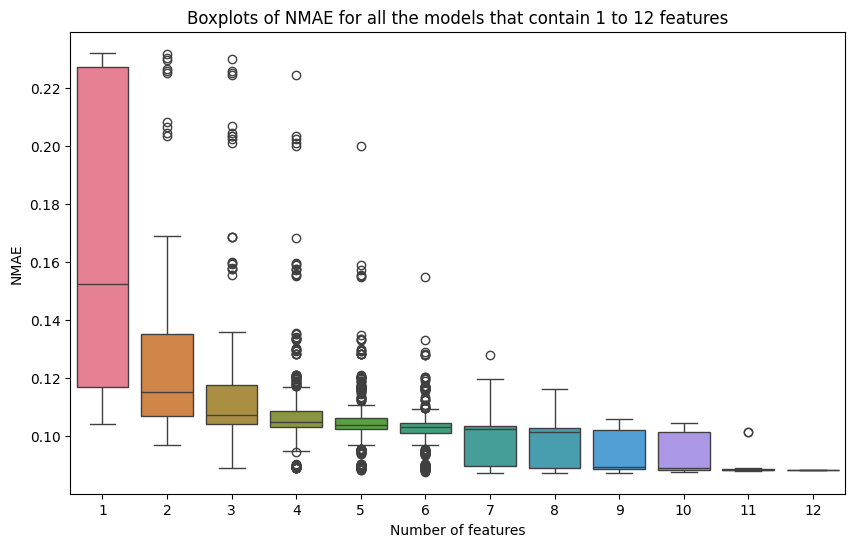

In [50]:
# Set up the Matplotlib figure
fig, ax = plt.subplots(figsize=(10, 6))

NMAE_list = {}
for i in range(1,13):

    indices_subset_len_i = [index for index, element in enumerate(indices_subsets) if len(element) == i]
    NMAE_i = list(NMAE_vector[indices_subset_len_i])
    NMAE_list[i] = NMAE_i
# Create boxplots using Seaborn
sns.boxplot(data=NMAE_list, ax=ax)

# Set labels and title
ax.set(xlabel='Number of features', ylabel='NMAE', title='Boxplots of NMAE for all the models that contain 1 to 12 features')

# Show the plot
plt.show()